In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import json
import neonx
# import import_ipynb
# import PositionsTrials
# from PositionsTrials import Adj

df = pd.read_csv("Adj.csv")
df.set_index('Issuer', inplace= True)

#PreProcessing Data
list1=[]
for n in df.index:
    n = n.replace(" ","").replace("-","").replace("&","")
    list1.append(n)
df.index = list1
df.iloc[1][2]
Issuers = df.index

matrix = np.triu(df.values, k=0)
from scipy import sparse
matrix=sparse.csr_matrix(matrix)
matrix = matrix.tocoo()

node1   = matrix.row
node2   = matrix.col
weights = matrix.data

data = pd.DataFrame(data=None,columns=['node1','node2','weights'])
data['node1']=node1
data['node2']=node2
data['weights']=weights


In [113]:
from neo4j.v1 import GraphDatabase, basic_auth
import pandas as pd
uri ="bolt://localhost:7687"
driver = GraphDatabase.driver("bolt://localhost:7687",auth =basic_auth("neo4j", "welcome"))
session = driver.session()

df = pd.read_csv("Adj.csv")

df.set_index('Issuer', inplace= True)

In [136]:

# class DateEncoder(json.JSONEncoder):

#     def default(self, o):
#         if isinstance(o, datetime.date):
#             return o.strftime('%Y-%m-%d')
#         return json.JSONEncoder.default(self, o)

# data = neonx.get_geoff(G, "LINKS_TO", DateEncoder())





In [92]:
data['node1'][1]

TypeError: string indices must be integers

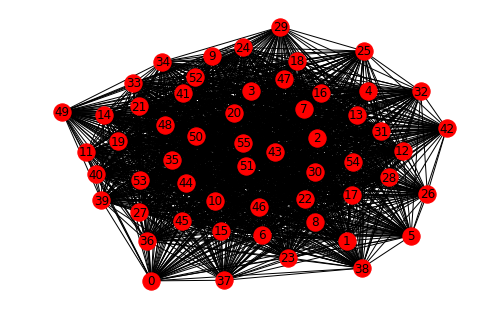

In [147]:
from json import JSONEncoder
from decimal import Decimal
import pickle

class PythonObjectEncoder(json.JSONEncoder):
    def default(self, obj):
        return {'_python_object': pickle.dumps(obj).decode('latin1')}

def as_python_object(dct):
    if '_python_object' in dct:
        return pickle.loads(dct['_python_object'].encode('latin1'))
    return dct

import json
from json import JSONEncoder
G=nx.Graph()

DA = zip(data['node1'],data['node2'],data['weights'])

# type(mydata)
# data_1=JSONEncoder().encode(data_1)
# data_2=JSONEncoder().encode(data_2)
# weight_1=JSONEncoder().encode(weight_1)
# G.add_weighted_edges_from(zip(data_1,data_2,weight_1))
j= json.dumps(DA, cls =PythonObjectEncoder)
DA_j = json.loads(j, object_hook=as_python_object)
G.add_weighted_edges_from(DA_j)
G.nodes
nx.draw(G, with_labels=True)

In [157]:
G1 = nx.Graph()
neonx.write_to_neo("http://localhost:7474/browser",G1, 'weight')

AttributeError: 'NodeView' object has no attribute 'decode'

In [175]:
x = len(df.index)

# def add_person(self, name):
#     with self._driver.session() as session:
#         session.run("CREATE (a:Person {name: $name})", name=name)

statement = "merge (a:Issuer{Issuer:{A}}) return a:id"

for c in df.index:
    session.run(statement, {"A":c})
   
r ={1}
for i in range(x):
    for j in range(x):
          if(df.iloc[i][j]  != 0 ):
                 session.run("MATCH (a),(b) WHERE a.Issuer=$a AND b.Issuer=$b MATCH (a)-[r:RELTYPE]-(b) RETURN a,b,r", a= df.index[i], b=df.index[j]) 

# for record in session.run("MATCH (a),(b) WHERE a.Issuer=$a AND b.Issuer=$b MATCH (a)-[r:RELTYPE]-(b) RETURN r", a= df.index[i], b=df.index[j]):
#     print(record['b.Issuer'])
#     print(record['r'])
# def add_issuers(issuer):
#     session.run("MERGE (a:Issuer {issuer: $issuer}) "
#            "MERGE (a)-[:RELATED_TO]->(issuer:Issuer {issuer: $issuer})",issuer=issuer)
# def print_issuers(tx,issuer):
#     for record in tx.run("MATCH (a:Issuer)-[:RELATED_TO]-(issuer) WHERE a.issuer = $issuer "
#                          "RETURN issuer.issuer ORDER BY issuer.issuer", issuer=issuer):
#         print(record["issuer.issuer"])    


# with driver.session() as session:
#         session.write_transaction(add_issuers)
        

In [174]:

data = pd.DataFrame(data=None,columns=['node1','node2','weights'])
data['node1']=node1
data['node2']=node2
data['weights']=weights


import py2neo
from py2neo import Node, Relationship, Graph
graph = Graph(password= 'welcome' ,uri="http://localhost:7474/browser/")


tx = graph.begin()
for index, row in data.iterrows():
    tx.evaluate('''
      MATCH (a:Label1 {property:$label1})
      MERGE (a)-[r:R_TYPE]->(b:Label2 {property:$label2})
    ''', parameters = {'label1': row['node1'], 'label2': row['node2']})
tx.commit()
    



In [250]:
# df.index[10]

'Saudi Telecom Co'

In [236]:
import py2neo
from py2neo import Node, Relationship, Graph

In [237]:
# graph = Graph(password = 'welcome')

In [238]:
# graph.run("UNWIND range(1, 10) AS n RETURN n, n * n as n_sq").dump()

 n   n_sq 
----------
 1   1    
 2   4    
 3   9    
 4   16   
 5   25   
 6   36   
 7   49   
 8   64   
 9   81   
 10  100  


In [240]:
# commit()

NameError: name 'commit' is not defined